In [ ]:
!pip install scikit-fda

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.7/434.7 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 44.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 3.3 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import skfda
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
FHFA = pd.read_excel("/content/drive/MyDrive/FHFA.xls", header = 3, engine = 'xlrd')

#HPI = "Housing Price Index"
#SA = "Seasonally Adjusted"
#NSA = "Not Seasonally Adjusted"

HPI_SA = FHFA[['Month']]
for columnName in list(FHFA.columns):
    if "(SA)" in columnName:
        newColumnName = columnName.replace("\n", "").replace("(SA)", "")
        HPI_SA = pd.concat([HPI_SA, FHFA[columnName].rename(newColumnName)], axis = 1)

HPI_NSA = FHFA[['Month']]
for columnName in list(FHFA.columns):
    if "(NSA)" in columnName:
        newColumnName = columnName.replace("\n", "").replace("(NSA)", "")
        HPI_NSA = pd.concat([HPI_NSA, FHFA[columnName].rename(newColumnName)], axis = 1)

In [34]:
FHFA.head()

,Month,East North Central\n(NSA),East North Central\n(SA),East South Central\n(NSA),East South Central\n(SA),Middle Atlantic\n(NSA),Middle Atlantic\n(SA),Mountain\n\n(NSA),Mountain\n\n(SA),New England\n\n(NSA),...,Pacific\n\n(NSA),Pacific\n\n(SA),South Atlantic\n(NSA),South Atlantic\n(SA),West North Central\n(NSA),West North Central\n(SA),West South Central\n(NSA),West South Central\n(SA),USA\n\n(NSA),USA\n\n(SA)
0,1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,...,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1991-02-01,100.89,100.94,100.99,100.63,100.15,100.32,98.39,98.75,101.77,...,100.13,100.57,100.58,100.47,100.49,100.45,99.82,99.59,100.39,100.45
2,1991-03-01,101.30,100.90,100.85,100.43,100.10,99.82,100.21,100.63,101.52,...,99.96,100.13,101.00,100.60,100.43,100.13,100.62,100.49,100.68,100.48
3,1991-04-01,101.69,100.97,100.83,100.47,99.60,99.28,100.30,100.38,101.04,...,100.14,100.12,100.90,100.40,100.83,100.36,100.36,100.08,100.68,100.33
4,1991-05-01,102.30,101.32,101.14,100.76,99.72,99.24,100.70,100.49,99.83,...,100.34,100.10,100.77,100.46,100.80,100.32,100.76,100.27,100.84,100.38


In [ ]:
np.where(pd.isnull(HPI_SA))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
np.where(pd.isnull(HPI_NSA))

(array([], dtype=int64), array([], dtype=int64))

In [ ]:
HPI_SA.head()

,Month,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central,USA
0,1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1991-02-01,100.94,100.63,100.32,98.75,102.38,100.57,100.47,100.45,99.59,100.45
2,1991-03-01,100.90,100.43,99.82,100.63,101.36,100.13,100.60,100.13,100.49,100.48
3,1991-04-01,100.97,100.47,99.28,100.38,101.06,100.12,100.40,100.36,100.08,100.33
4,1991-05-01,101.32,100.76,99.24,100.49,99.85,100.10,100.46,100.32,100.27,100.38


In [ ]:
HPI_NSA.head()

,Month,East North Central,East South Central,Middle Atlantic,Mountain,New England,Pacific,South Atlantic,West North Central,West South Central,USA
0,1991-01-01,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
1,1991-02-01,100.89,100.99,100.15,98.39,101.77,100.13,100.58,100.49,99.82,100.39
2,1991-03-01,101.30,100.85,100.10,100.21,101.52,99.96,101.00,100.43,100.62,100.68
3,1991-04-01,101.69,100.83,99.60,100.30,101.04,100.14,100.90,100.83,100.36,100.68
4,1991-05-01,102.30,101.14,99.72,100.70,99.83,100.34,100.77,100.80,100.76,100.84


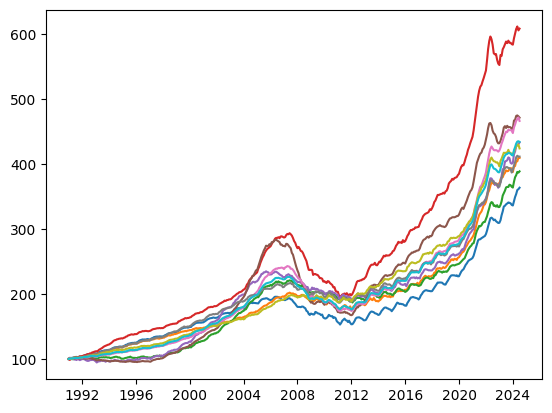

In [ ]:
index = 1
for columnName in list(HPI_NSA.columns):
    if columnName != "Month":
        plt.plot(HPI_NSA['Month'], HPI_NSA[columnName], label = f"Line {index}")
        index += 1

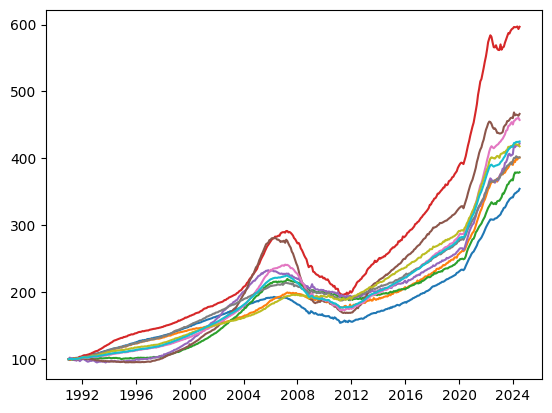

In [ ]:
index = 1
for columnName in list(HPI_SA.columns):
    if columnName != "Month":
        plt.plot(HPI_SA['Month'], HPI_SA[columnName], label = f"Line {index}")
        index += 1

In [ ]:
HPI_SA.to_csv("Seasonally Adjusted Housing Price Index.csv", encoding='utf-8', index=False)

In [ ]:
HPI_NSA.to_csv("Non-Seasonally Adjusted Housing Price Index.csv", encoding='utf-8', index=False)